In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from PIL import Image

### In the train dataset downloaded from kaggle, we have 25k different images of dogs and cats. Let's see some of these images from the dataset.

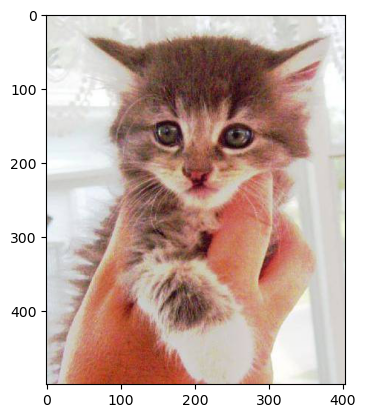

In [2]:
img = mpimg.imread('C:/Users/HARSH/OneDrive/Documents/Deep Learning Projects/Dog & Cat Classification (using Transfer Learning)/train/cat.100.jpg')
img_show = plt.imshow(img)
plt.show()

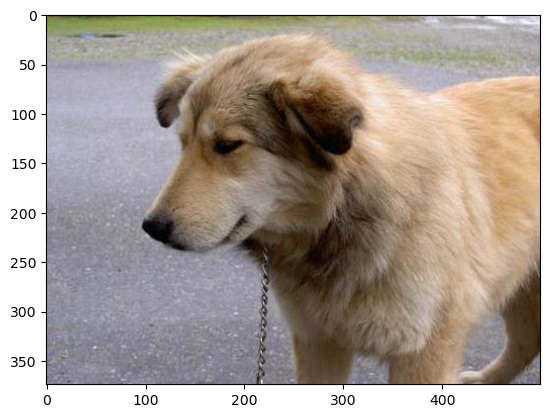

In [3]:
img = mpimg.imread('C:/Users/HARSH/OneDrive/Documents/Deep Learning Projects/Dog & Cat Classification (using Transfer Learning)/train/dog.1061.jpg')
img_show = plt.imshow(img)
plt.show()

### Here as we can see the images are of different height & width in the dataset. We want all these images of the same size in order to train the neural network. Also they are in RGB format which takes more time for computation as there are 3 matrix_value per pixel. But we will not convert images to grayscale as we can train models/networks on RGB format too.
### Now we will create a new directory/file with 2000 resized images of dogs and cats. This file with resized images is made in "Download data from kaggle.ipynb", to see how open that file.

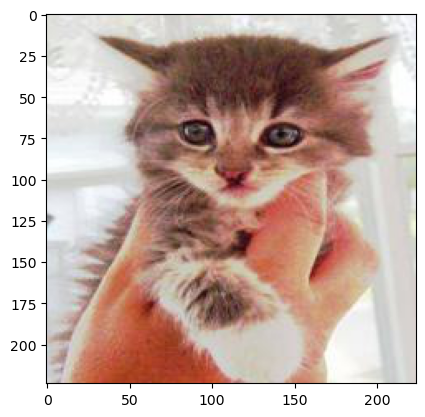

In [4]:
# Now seeing if the images are resized in the new folder 'Resized_img':
img = mpimg.imread('C:/Users/HARSH/OneDrive/Documents/Deep Learning Projects/Dog & Cat Classification (using Transfer Learning)/Resized_img/cat.100.jpg')
img_show = plt.imshow(img)
plt.show()

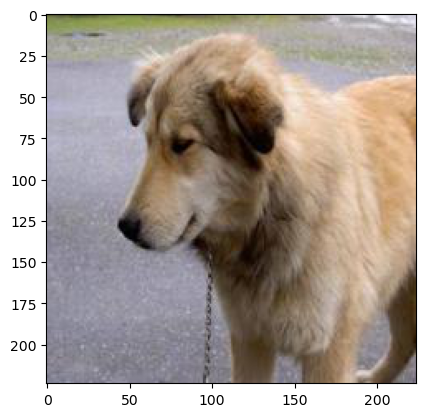

In [5]:
# Displaying Resized Dog image:
img = mpimg.imread('C:/Users/HARSH/OneDrive/Documents/Deep Learning Projects/Dog & Cat Classification (using Transfer Learning)/Resized_img/dog.1061.jpg')
img_show = plt.imshow(img)
plt.show()

## ADDING LABEL:
#### Now we will add Labels to the images that are stored, for our model to indentify the image: Dog --> 1 & Cat --> 0.

In [6]:
import os

file = os.listdir('Resized_img')

print('The number of Images in Resized_img is:', len(file))

The number of Images in Resized_img is: 2001


In [7]:
# Creating a list to store labels of 2001 different dog and cat images: 
label = []

for i in range(2001):
    file_name = file[i]
    img_name = file_name[0:3]

    if img_name == 'dog':
        label.append(1)
    else:
        label.append(0)

In [8]:
print('The labels for there correspoding images in the file are:')
print(file[0:3], file[1500:1502])
print('Label: ', label[0:3], label[1500:1502])

The labels for there correspoding images in the file are:
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg'] ['dog.10447.jpg', 'dog.10448.jpg']
Label:  [0, 0, 0] [1, 1]


## CONVERTING RESIZED IMAGES INTO NUMPY ARRAY:

In [9]:
import cv2

# Creating a list to store numpy array value for all the resized images
array = []
resized_folder = 'C:/Users/HARSH/OneDrive/Documents/Deep Learning Projects/Dog & Cat Classification (using Transfer Learning)/Resized_img/'

for i in file:
    file_location = os.path.join(resized_folder, i)
    img = cv2.imread(file_location)              # Read image
    array.append(img)


array = np.array(array)  # Convert list to NumPy array

In [10]:
# Checking the shape of the final array:
print('The shape of the numpy array is: ',array.shape) 

# Printing the 1st numpy array of the image:
print(array[0])

The shape of the numpy array is:  (2001, 224, 224, 3)
[[[ 87 163 205]
  [ 89 165 207]
  [ 92 168 210]
  ...
  [125 203 246]
  [123 200 246]
  [123 200 246]]

 [[ 87 163 205]
  [ 89 165 207]
  [ 92 168 210]
  ...
  [125 203 246]
  [124 201 247]
  [123 200 246]]

 [[ 87 163 205]
  [ 89 165 207]
  [ 92 168 210]
  ...
  [125 203 246]
  [124 201 247]
  [124 201 247]]

 ...

 [[ 57 123 158]
  [ 57 123 158]
  [ 56 124 159]
  ...
  [  0   2   1]
  [  0   2   1]
  [  0   2   1]]

 [[ 55 121 156]
  [ 56 122 157]
  [ 55 123 158]
  ...
  [  0   2   1]
  [  0   2   1]
  [  0   2   1]]

 [[ 54 120 155]
  [ 54 120 155]
  [ 53 121 156]
  ...
  [  0   2   1]
  [  0   2   1]
  [  0   2   1]]]


#### Intialising i/p(x) and o/p(y) for the model:

In [11]:
x = array
y = np.asarray(label)

## SCALING THE DATA:

In [12]:
# Dividing by 255 cause there are 0 to 255 values for a pixel, this division will scale down the value for a pixel in the range 0 to 1:
x = x/255

print(x[0])

[[[0.34117647 0.63921569 0.80392157]
  [0.34901961 0.64705882 0.81176471]
  [0.36078431 0.65882353 0.82352941]
  ...
  [0.49019608 0.79607843 0.96470588]
  [0.48235294 0.78431373 0.96470588]
  [0.48235294 0.78431373 0.96470588]]

 [[0.34117647 0.63921569 0.80392157]
  [0.34901961 0.64705882 0.81176471]
  [0.36078431 0.65882353 0.82352941]
  ...
  [0.49019608 0.79607843 0.96470588]
  [0.48627451 0.78823529 0.96862745]
  [0.48235294 0.78431373 0.96470588]]

 [[0.34117647 0.63921569 0.80392157]
  [0.34901961 0.64705882 0.81176471]
  [0.36078431 0.65882353 0.82352941]
  ...
  [0.49019608 0.79607843 0.96470588]
  [0.48627451 0.78823529 0.96862745]
  [0.48627451 0.78823529 0.96862745]]

 ...

 [[0.22352941 0.48235294 0.61960784]
  [0.22352941 0.48235294 0.61960784]
  [0.21960784 0.48627451 0.62352941]
  ...
  [0.         0.00784314 0.00392157]
  [0.         0.00784314 0.00392157]
  [0.         0.00784314 0.00392157]]

 [[0.21568627 0.4745098  0.61176471]
  [0.21960784 0.47843137 0.61568627]


## TRAIN TEST SPLIT:

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
print('Number of images for traning data: ', x_train.shape, '& in testing data: ', x_test.shape)
print('Number of output images for traning data:: ', y_train.shape, '& in testing data: ', y_test.shape)

Number of images for traning data:  (1600, 224, 224, 3) & in testing data:  (401, 224, 224, 3)
Number of output images for traning data::  (1600,) & in testing data:  (401,)


## BUILDING NEURAL NETWORK:

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2

In [16]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))       # Load MobileNetV2 as the base model

base_model.trainable = False                       # Freeze the base model (optional)

# Define the model
model = keras.Sequential([
    base_model,                                    # MobileNetV2 as a feature extractor
    keras.layers.GlobalAveragePooling2D(),         # Converts feature maps to a 1D vector
    keras.layers.Dense(2)                          # Output layer for 2 class
])

model.summary()                                    # Print summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## COMPILING THE MODEL:

In [17]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## MACHING THE SHAPE/FORMAT OF y_train & Model's Output USING One-Hot Encoding:

In [18]:
# Shape of y_train before One-Hot Encoding:
print('Shape of y_train: ', y_train)
print('Model\'s output shape: ', model.output_shape)

Shape of y_train:  [0 1 0 ... 0 1 1]
Model's output shape:  (None, 2)


In [19]:
from tensorflow.keras.utils import to_categorical

num_classes = 2                                               # This sets the number of unique classes in our dataset (e.g., "cat" vs. "dog").
y_train = to_categorical(y_train, num_classes=num_classes)    # Converts categorical integer labels (e.g., 0, 1) into one-hot vectors (e.g., [1, 0],
                                                              #  [0, 1]).

print("Updated y_train shape:", y_train.shape)                # Should be (6400, 2)
print("Model output shape:", model.output_shape)              # Should also be (None, 2)

Updated y_train shape: (1600, 2)
Model output shape: (None, 2)


```
How to_categorical() Works:
If y_train contains integer labels (0 for "cat", 1 for "dog"), to_categorical() converts them into one-hot encoded format.
Each class label is replaced by a vector of length num_classes (in this case, 2), where:
The index corresponding to the class is set to 1, and all others are 0.
Example Transformation:
```
| Original `y_train` | One-Hot Encoded `y_train` |
|--------------------|-------------------------|
| 0 (Cat)           | `[1, 0]`                 |
| 1 (Dog)           | `[0, 1]`                 |
| 1 (Dog)           | `[0, 1]`                 |
| 0 (Cat)           | `[1, 0]`                 |

## TRAINING THE NEURAL NETWORK:

In [20]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 536ms/step - accuracy: 0.3689 - loss: 4.1144
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 523ms/step - accuracy: 0.4075 - loss: 0.8561
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 523ms/step - accuracy: 0.5577 - loss: 0.7065
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 521ms/step - accuracy: 0.7914 - loss: 0.5649
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 529ms/step - accuracy: 0.9226 - loss: 0.3549


## MODEL EVALUATION ON TEST DATA, BY CHECKING THE ACCURACY & SCORE:

In [21]:
y_test = to_categorical(y_test, num_classes = 2)          # Converting y_test in right format

score, acc = model.evaluate(x_test, y_test)               # The model first predicts (y_predicted), then compares it with y_test, and finally computes 
                                                          # loss & accuracy based on the defined metrics.
print('Test Loss: ', score)
print('Test Accuracy: ', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 494ms/step - accuracy: 0.9240 - loss: 0.5833
Test Loss:  0.4923264980316162
Test Accuracy:  0.9251870512962341


#### **`.evaluate()` in Keras:**  

The `.evaluate()` function in Keras is used to **assess the performance** of a trained model on a given dataset (usually the test set).  

**Syntax:**
```python
score, acc = model.evaluate(x_test, y_test)
```
**What Happens Internally?**  

**1. Forward Pass (Prediction):**  
- The model takes `x_test` as input and computes the predicted outputs (`y_predicted`).  

**2. Loss Calculation (`score`):**  
- The predicted values are compared with the actual labels (`y_test`) using the **loss function** (e.g., categorical cross-entropy, mean squared error).  
- The computed **loss value** is stored in `score`.  

**3. Metric Calculation (`acc`):**  
- If an accuracy metric is defined (e.g., `accuracy` for classification problems), it is computed by comparing `y_predicted` with `y_test`.  
- The fraction of correctly classified samples is stored in `acc`.  

**Returns:**  
- **`score`**: The **loss** value on the test dataset.  
- **`acc`**: The **accuracy** (or other metrics specified during `model.compile()`).  


## BUILDING THE PREDICTIVE SYSTEM:

In [22]:
img_path = input('Enter the path of the Image:')

input_img = cv2.imread(img_path)

cv2.imshow('Input Image', input_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_resize = cv2.resize(input_img, (224, 224))

img_scaled = img_resize/255

img_reshape = np.reshape(img_scaled, [1, 224, 224, 3])

img_pred = model.predict(img_reshape)
print('The probability of the classes [0(Cat), 1(Dog)] are: ', img_pred)

img_label = np.argmax(img_pred)
if img_label == 0:
    print('The given image is of a Cat')
else:
    print('The given imaged is of Dog')

Enter the path of the Image: C:\Users\HARSH\OneDrive\Documents\Deep Learning Projects\Dog & Cat Classification (using Transfer Learning)\cat_predict_image.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The probability of the classes [0(Cat), 1(Dog)] are:  [[ 1.7624049 -1.518758 ]]
The given image is of a Cat


**Path of Cat Image:** C:\Users\HARSH\OneDrive\Documents\Deep Learning Projects\Dog & Cat Classification (using Transfer Learning)\cat_predict_image.jpg

**Path of Dog Image:** C:\Users\HARSH\OneDrive\Documents\Deep Learning Projects\Dog & Cat Classification (using Transfer Learning)\dog_predict_image.jpg